In [1]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from keras.callbacks import TensorBoard

from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import os
import numpy as np


from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model 

import skimage
from  skimage.transform import resize
from  skimage import transform

import pickle
import time

tf.compat.v1.disable_eager_execution()

batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


NAME = "CIFAR-10-{}".format(int(time.time()))

model = load_model("second_model.h5")
model.load_weights ("second_model_weights.h5")

#new_shape = (224, 224, 3)
#x_train = np.asarray([transform.resize(x_train, new_shape) for x_train in x_train])

#new_shape = (224,224,3)
#x_train = [skimage.transform.resize(x_train, new_shape) for x_train in x_train]


                    


/home/trojan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/trojan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/trojan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/trojan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

 12443648/170498071 [=>............................] - ETA: 3:08

KeyboardInterrupt: 

In [2]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 256)         1179904   
_________________________________________________________________
activation_9 (Activation)    (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 256)         590080    
_________________________________________________________________
activation_10 (Activation)   (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)              

In [ ]:
from keras.models import load_model 
model.save("second_model.h5")

In [3]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 9s 900us/step
Test loss: 39.042401083374024
Test accuracy: 0.6589000225067139


In [2]:
pred=model.predict(x_test, verbose=1)

10000/10000 [==============================] - 3s 319us/step


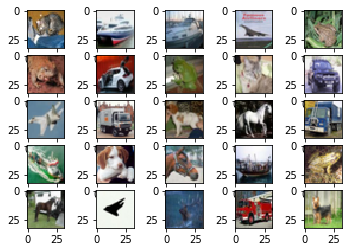

In [3]:
from matplotlib import pyplot
from keras.datasets import cifar10
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            pyplot.subplot2grid((5,5),(i,j))
            pyplot.imshow((X[k]))
            k = k+1
    # show the plot
    pyplot.show()
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_imgs(x_test[:25])

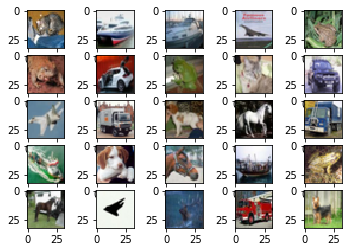

['dog', 'ship', 'ship', 'airplane', 'frog', 'automobile', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'automobile', 'airplane', 'bird', 'truck', 'dog']


In [4]:
import numpy as np

show_imgs(x_test[:25])
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[:25]),1)
print ([labels[x] for x in indices])

In [5]:
preds_cls_idx = pred.argmax(axis=-1)

In [8]:
import pandas as pd
# Get classes by np.round
# Get filenames (set shuffle=false in generator is important)
#filenames=test_generator.filenames

y = [labels[x] for x in preds_cls_idx]
results=pd.DataFrame({"prediction_airplane": pred [:,0],
                          "prediction_automobile": pred [:,1],
                          "prediction_bird": pred [:,2],
                          "prediction_cat": pred [:,3],
                          "prediction_deer": pred [:,4],
                          "prediction_dog": pred [:,5],
                          "prediction_frog": pred [:,6],
                          "prediction_horse": pred [:,7],
                          "prediction_ship": pred [:,8],
                          "prediction_truck": pred [:,9], "class_index": preds_cls_idx,
                          "class_name": y })

results.to_csv("results8.csv",index=False)





In [2]:
test_image1 =image.load_img('/home/trojan/Desktop/adorable-image-of-lapphund-puppy.jpg',target_size =(32,32))

test_image =image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
#test_image = test_image.astype('float32')

pred=model.predict(test_image, verbose=1)

labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

indices2 = np.argmax(model.predict(test_image),1)
                     
print([labels[x] for x in indices2])

IsADirectoryError: [Errno 21] Is a directory: '/home/trojan/Desktop/imagess'

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=r"/home/trojan/Desktop/imagess",
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 8 images belonging to 1 classes.


In [12]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()

In [13]:
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

indices2 = np.argmax(model.predict(test_generator),1)
                     
print([labels[x] for x in indices2])

8/8 [==============================] - 0s 24ms/step
['airplane', 'cat', 'truck', 'ship', 'automobile', 'truck', 'frog', 'cat']
